In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving emi_prediction_dataset (1).csv to emi_prediction_dataset (1).csv


In [3]:
data = pd.read_csv('emi_prediction_dataset (1).csv')
data

/tmp/ipython-input-586568600.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('emi_prediction_dataset (1).csv')


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404795,27.0,Male,Married,Graduate,32400.0,Private,5.0,Large Indian,Rented,10400.0,...,No,0.0,649.0,62000.0,32600.0,Personal Loan EMI,506000.0,47,Not_Eligible,500.0
404796,38.0,Male,Married,Post Graduate,49200.0,Private,1.9,MNC,Own,0.0,...,No,0.0,712.0,142200.0,38100.0,Personal Loan EMI,708000.0,33,Not_Eligible,5200.0
404797,32.0,Male,Single,Graduate,25700.0,Private,3.2,MNC,Rented,6300.0,...,No,0.0,676.0,191600.0,39700.0,Home Appliances EMI,93000.0,21,High_Risk,5665.0
404798,48.0,Male,Married,Graduate,47200.0,Private,3.0,MNC,Own,0.0,...,No,0.0,784.0,170400.0,45600.0,Home Appliances EMI,144000.0,36,Eligible,14460.0


In [ ]:
data.insert(0, 'ID', range(1, len(data) + 1))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      404800 non-null  int64  
 1   age                     404800 non-null  object 
 2   gender                  404800 non-null  object 
 3   marital_status          404800 non-null  object 
 4   education               402396 non-null  object 
 5   monthly_salary          404800 non-null  object 
 6   employment_type         404800 non-null  object 
 7   years_of_employment     404800 non-null  float64
 8   company_type            404800 non-null  object 
 9   house_type              404800 non-null  object 
 10  monthly_rent            402374 non-null  float64
 11  family_size             404800 non-null  int64  
 12  dependents              404800 non-null  int64  
 13  school_fees             404800 non-null  float64
 14  college_fees        

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      404800 non-null  int64  
 1   age                     404800 non-null  object 
 2   gender                  404800 non-null  object 
 3   marital_status          404800 non-null  object 
 4   education               402396 non-null  object 
 5   monthly_salary          404800 non-null  object 
 6   employment_type         404800 non-null  object 
 7   years_of_employment     404800 non-null  float64
 8   company_type            404800 non-null  object 
 9   house_type              404800 non-null  object 
 10  monthly_rent            402374 non-null  float64
 11  family_size             404800 non-null  int64  
 12  dependents              404800 non-null  int64  
 13  school_fees             404800 non-null  float64
 14  college_fees        

In [4]:

data["education"] = data["education"].fillna("Unknown")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               404800 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

In [ ]:
data

In [5]:
data["monthly_rent"] = data["monthly_rent"].fillna(data["monthly_rent"].mean())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      404800 non-null  int64  
 1   age                     404800 non-null  object 
 2   gender                  404800 non-null  object 
 3   marital_status          404800 non-null  object 
 4   education               404800 non-null  object 
 5   monthly_salary          404800 non-null  object 
 6   employment_type         404800 non-null  object 
 7   years_of_employment     404800 non-null  float64
 8   company_type            404800 non-null  object 
 9   house_type              404800 non-null  object 
 10  monthly_rent            404800 non-null  float64
 11  family_size             404800 non-null  int64  
 12  dependents              404800 non-null  int64  
 13  school_fees             404800 non-null  float64
 14  college_fees        

In [6]:
data["credit_score"] = data["credit_score"].fillna(data["credit_score"].mean())
data["emergency_fund"] = data["emergency_fund"].fillna(data["emergency_fund"].mean())
data["bank_balance"] = data["bank_balance"].str.replace(".0", "").astype(float)
data["bank_balance"] = data["bank_balance"].fillna(data["bank_balance"].mean())



In [ ]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      404800 non-null  int64  
 1   age                     404800 non-null  object 
 2   gender                  404800 non-null  object 
 3   marital_status          404800 non-null  object 
 4   education               404800 non-null  object 
 5   monthly_salary          404800 non-null  object 
 6   employment_type         404800 non-null  object 
 7   years_of_employment     404800 non-null  float64
 8   company_type            404800 non-null  object 
 9   house_type              404800 non-null  object 
 10  monthly_rent            404800 non-null  float64
 11  family_size             404800 non-null  int64  
 12  dependents              404800 non-null  int64  
 13  school_fees             404800 non-null  float64
 14  college_fees        

,ID,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,1,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,2,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,3,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,4,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,5,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404795,404796,27.0,Male,Married,Graduate,32400.0,Private,5.0,Large Indian,Rented,...,No,0.0,649.0,62000.0,32600.0,Personal Loan EMI,506000.0,47,Not_Eligible,500.0
404796,404797,38.0,Male,Married,Post Graduate,49200.0,Private,1.9,MNC,Own,...,No,0.0,712.0,142200.0,38100.0,Personal Loan EMI,708000.0,33,Not_Eligible,5200.0
404797,404798,32.0,Male,Single,Graduate,25700.0,Private,3.2,MNC,Rented,...,No,0.0,676.0,191600.0,39700.0,Home Appliances EMI,93000.0,21,High_Risk,5665.0
404798,404799,48.0,Male,Married,Graduate,47200.0,Private,3.0,MNC,Own,...,No,0.0,784.0,170400.0,45600.0,Home Appliances EMI,144000.0,36,Eligible,14460.0


In [ ]:
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [ID, age, gender, marital_status, education, monthly_salary, employment_type, years_of_employment, company_type, house_type, monthly_rent, family_size, dependents, school_fees, college_fees, travel_expenses, groceries_utilities, other_monthly_expenses, existing_loans, current_emi_amount, credit_score, bank_balance, emergency_fund, emi_scenario, requested_amount, requested_tenure, emi_eligibility, max_monthly_emi]
Index: []

[0 rows x 28 columns]


In [ ]:
invalid_credit = data[(data["credit_score"] < 300) | (data["credit_score"] > 850)]
print(f"Invalid credit score entries: {len(invalid_credit)}")

Invalid credit score entries: 4776


In [7]:
data = data[data["credit_score"].between(300, 850)]
row_count = len(data)
print("Total rows:", row_count)

Total rows: 400024


In [ ]:
# Find rows where conversion to float fails
mask = pd.to_numeric(data["monthly_salary"], errors="coerce").isna()

invalid_rows = data[mask]
print("Rows where 'loan_amount' is not a valid float:")
print(invalid_rows)

Rows where 'loan_amount' is not a valid float:
            ID   age  gender marital_status      education monthly_salary  \
844        845  27.0  Female         Single       Graduate      64300.0.0   
1025      1026  48.0  Female        Married  Post Graduate    23400.0.0.0   
1244      1245  38.0    Male        Married       Graduate      22500.0.0   
1252      1253  32.0    Male         Single    High School      22600.0.0   
1384      1385  58.0    Male        Married   Professional     111900.0.0   
...        ...   ...     ...            ...            ...            ...   
402339  402340  27.0  Female         Single       Graduate      67800.0.0   
402819  402820  48.0    Male         Single  Post Graduate      71100.0.0   
403091  403092  27.0  Female         Single       Graduate      56100.0.0   
403182  403183  32.0  Female         Single       Graduate      38500.0.0   
403504  403505  38.0  Female        Married   Professional      81100.0.0   

       employment_type  year

In [8]:
data["monthly_salary"] = data["monthly_salary"].astype(str).str.replace(".0", "", regex=False)
data["monthly_salary"] = pd.to_numeric(data["monthly_salary"], errors="coerce")
data["monthly_salary"].fillna(data["monthly_salary"].mean(), inplace=True)

/tmp/ipython-input-3275425456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["monthly_salary"] = data["monthly_salary"].astype(str).str.replace(".0", "", regex=False)
/tmp/ipython-input-3275425456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["monthly_salary"] = pd.to_numeric(data["monthly_salary"], errors="coerce")
/tmp/ipython-input-3275425456.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The beh

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400024 entries, 0 to 404799
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      400024 non-null  int64  
 1   age                     400024 non-null  object 
 2   gender                  400024 non-null  object 
 3   marital_status          400024 non-null  object 
 4   education               400024 non-null  object 
 5   monthly_salary          400024 non-null  float64
 6   employment_type         400024 non-null  object 
 7   years_of_employment     400024 non-null  float64
 8   company_type            400024 non-null  object 
 9   house_type              400024 non-null  object 
 10  monthly_rent            400024 non-null  float64
 11  family_size             400024 non-null  int64  
 12  dependents              400024 non-null  int64  
 13  school_fees             400024 non-null  float64
 14  college_fees            4

In [ ]:
# Find rows where conversion to float fails
mask = pd.to_numeric(data["age"], errors="coerce").isna()

invalid_rows = data[mask]
print("Rows where 'age' is not a valid int:")
print(invalid_rows)

Rows where 'age' is not a valid int:
Empty DataFrame
Columns: [ID, age, gender, marital_status, education, monthly_salary, employment_type, years_of_employment, company_type, house_type, monthly_rent, family_size, dependents, school_fees, college_fees, travel_expenses, groceries_utilities, other_monthly_expenses, existing_loans, current_emi_amount, credit_score, bank_balance, emergency_fund, emi_scenario, requested_amount, requested_tenure, emi_eligibility, max_monthly_emi]
Index: []

[0 rows x 28 columns]


In [ ]:
print(data.isnull().sum())

ID                        0
age                       0
gender                    0
marital_status            0
education                 0
monthly_salary            0
employment_type           0
years_of_employment       0
company_type              0
house_type                0
monthly_rent              0
family_size               0
dependents                0
school_fees               0
college_fees              0
travel_expenses           0
groceries_utilities       0
other_monthly_expenses    0
existing_loans            0
current_emi_amount        0
credit_score              0
bank_balance              0
emergency_fund            0
emi_scenario              0
requested_amount          0
requested_tenure          0
emi_eligibility           0
max_monthly_emi           0
dtype: int64


In [ ]:
data = data.dropna(subset=["age"])
len(data)

400024

In [ ]:
# Find rows where 'loan_amount' is NaN
nan_rows = data[data["age"].isnull()]
print(nan_rows)

Empty DataFrame
Columns: [ID, age, gender, marital_status, education, monthly_salary, employment_type, years_of_employment, company_type, house_type, monthly_rent, family_size, dependents, school_fees, college_fees, travel_expenses, groceries_utilities, other_monthly_expenses, existing_loans, current_emi_amount, credit_score, bank_balance, emergency_fund, emi_scenario, requested_amount, requested_tenure, emi_eligibility, max_monthly_emi]
Index: []

[0 rows x 28 columns]


In [9]:
# Convert to string (NaN becomes 'nan'), replace ".0.0", then convert numeric
data["age"] = data["age"].astype(str).str.replace(".0.0", "", regex=False).astype(float)
data["age"] = data["age"].astype(int)

/tmp/ipython-input-1219763792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["age"] = data["age"].astype(str).str.replace(".0.0", "", regex=False).astype(float)
/tmp/ipython-input-1219763792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["age"] = data["age"].astype(int)


In [10]:
data["monthly_rent"] = data["monthly_rent"].fillna(data["monthly_rent"].mean())

/tmp/ipython-input-3592306311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["monthly_rent"] = data["monthly_rent"].fillna(data["monthly_rent"].mean())


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400024 entries, 0 to 404799
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      400024 non-null  int64  
 1   age                     400024 non-null  int64  
 2   gender                  400024 non-null  object 
 3   marital_status          400024 non-null  object 
 4   education               400024 non-null  object 
 5   monthly_salary          400024 non-null  int64  
 6   employment_type         400024 non-null  object 
 7   years_of_employment     400024 non-null  float64
 8   company_type            400024 non-null  object 
 9   house_type              400024 non-null  object 
 10  monthly_rent            400024 non-null  float64
 11  family_size             400024 non-null  int64  
 12  dependents              400024 non-null  int64  
 13  school_fees             400024 non-null  float64
 14  college_fees            4

In [11]:
# ---------- 4️⃣ CONSISTENCY ----------
# EMI should be <= 60% of income (example business rule)
data  = data[data["current_emi_amount"] < 0.6 * data["monthly_salary"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398812 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     398812 non-null  int64  
 1   gender                  398812 non-null  object 
 2   marital_status          398812 non-null  object 
 3   education               398812 non-null  object 
 4   monthly_salary          398812 non-null  int64  
 5   employment_type         398812 non-null  object 
 6   years_of_employment     398812 non-null  float64
 7   company_type            398812 non-null  object 
 8   house_type              398812 non-null  object 
 9   monthly_rent            398812 non-null  float64
 10  family_size             398812 non-null  int64  
 11  dependents              398812 non-null  int64  
 12  school_fees             398812 non-null  float64
 13  college_fees            398812 non-null  float64
 14  travel_expenses         3

In [ ]:
data.head(100)

,ID,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,1,38,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,2,38,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,3,38,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,4,58,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,5,48,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,48,Male,Married,Graduate,23600.0,Government,6.5,Small,Own,...,Yes,5600.0,755.0,133100.0,32300.0,Education EMI,84000.0,13,Not_Eligible,2633.4
96,97,38,Male,Married,Graduate,23300.0,Private,0.5,MNC,Family,...,Yes,2900.0,637.0,47500.0,21900.0,Vehicle EMI,467000.0,59,Not_Eligible,582.4
97,98,32,Male,Married,Graduate,81600.0,Private,6.5,Startup,Rented,...,No,0.0,706.0,318800.0,141100.0,Home Appliances EMI,270000.0,7,Not_Eligible,5950.0
98,99,58,Male,Married,Post Graduate,113300.0,Private,36.0,Large Indian,Rented,...,No,0.0,846.0,317200.0,103300.0,Home Appliances EMI,208000.0,15,Not_Eligible,1500.0


In [12]:
data["emi_to_income_ratio"] = round(data["max_monthly_emi"] / data["monthly_salary"],2)
data.head(100)

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi,emi_to_income_ratio
0,38,Female,Married,Professional,82600,Private,0.9,Mid-size,Rented,20000.0,...,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0,0.01
1,38,Female,Married,Graduate,21500,Private,7.0,MNC,Family,0.0,...,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0,0.03
2,38,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,...,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0,0.32
3,58,Female,Married,High School,66800,Private,2.2,Mid-size,Own,0.0,...,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0,0.24
4,48,Female,Married,Professional,57300,Private,3.4,Mid-size,Family,0.0,...,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,48,Male,Married,Graduate,23600,Government,6.5,Small,Own,0.0,...,5600.0,755.0,133100.0,32300.0,Education EMI,84000.0,13,Not_Eligible,2633.4,0.11
96,38,Male,Married,Graduate,23300,Private,0.5,MNC,Family,0.0,...,2900.0,637.0,47500.0,21900.0,Vehicle EMI,467000.0,59,Not_Eligible,582.4,0.02
97,32,Male,Married,Graduate,81600,Private,6.5,Startup,Rented,18200.0,...,0.0,706.0,318800.0,141100.0,Home Appliances EMI,270000.0,7,Not_Eligible,5950.0,0.07
98,58,Male,Married,Post Graduate,113300,Private,36.0,Large Indian,Rented,21800.0,...,0.0,846.0,317200.0,103300.0,Home Appliances EMI,208000.0,15,Not_Eligible,1500.0,0.01


Analyze EMI eligibility distribution patterns across different lending scenarios


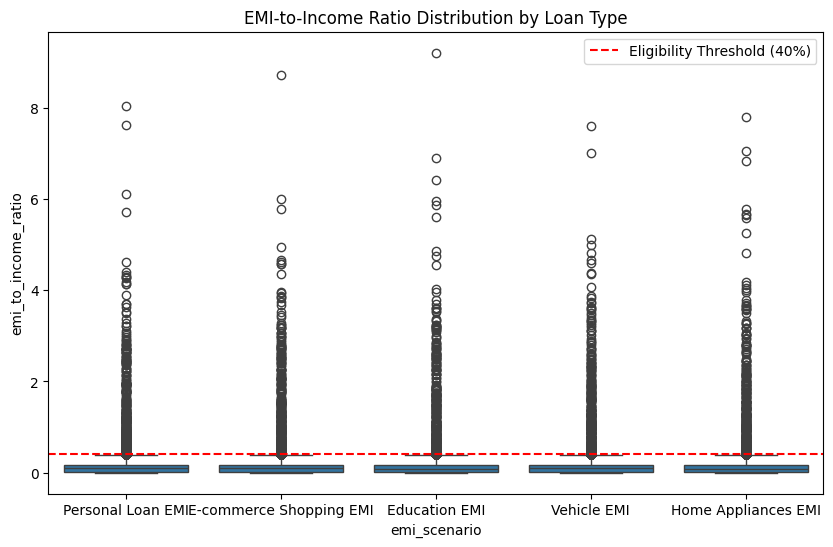

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="emi_scenario", y="emi_to_income_ratio", data=data)
plt.axhline(0.4, color='red', linestyle='--', label='Eligibility Threshold (40%)')
plt.title("EMI-to-Income Ratio Distribution by Loan Type")
plt.legend()
plt.show()

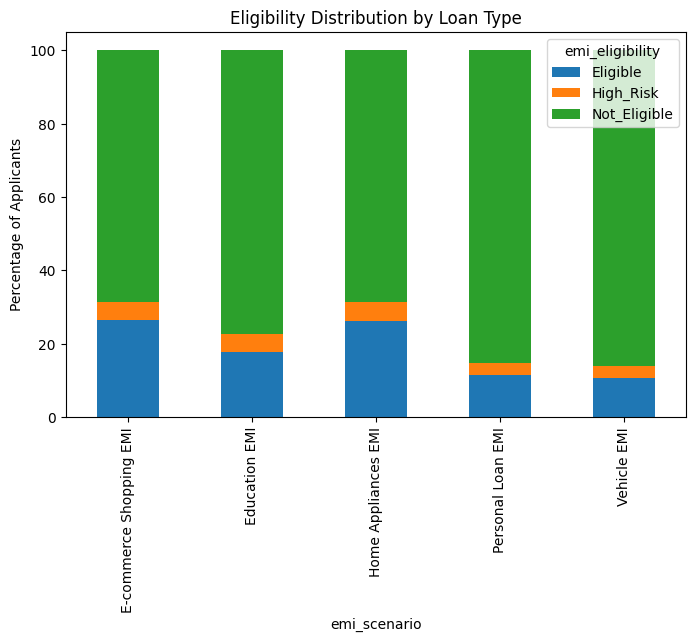

In [ ]:
eligibility = data.groupby("emi_scenario")["emi_eligibility"].value_counts(normalize=True).unstack().fillna(0) * 100
eligibility.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Eligibility Distribution by Loan Type")
plt.ylabel("Percentage of Applicants")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


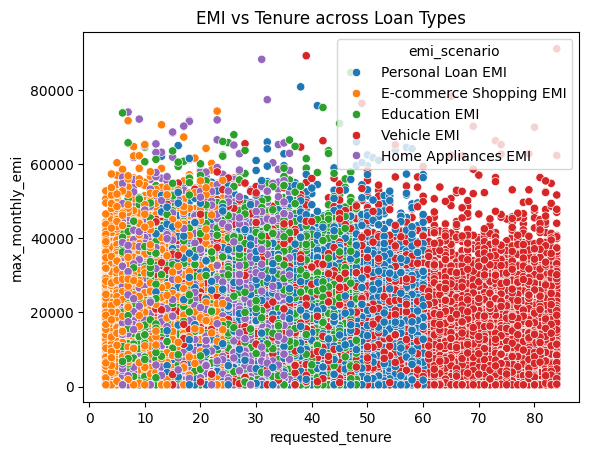

In [ ]:
sns.scatterplot(x="requested_tenure", y="max_monthly_emi", hue="emi_scenario", data=data)
plt.title("EMI vs Tenure across Loan Types")
plt.show()

Study correlation between financial variables and loan approval rates


In [ ]:
df = pd.DataFrame({

    "current_emi_amount": data["current_emi_amount"],
    "credit_score": data["credit_score"],
    "bank_balance": data["bank_balance"],
    "emergency_fund": data["emergency_fund"],
    "emi_eligibility": data["emi_eligibility"].map({
        "Eligible": 2,
        "High_Risk": 1,
        "Not_Eligible": 0
    })
})

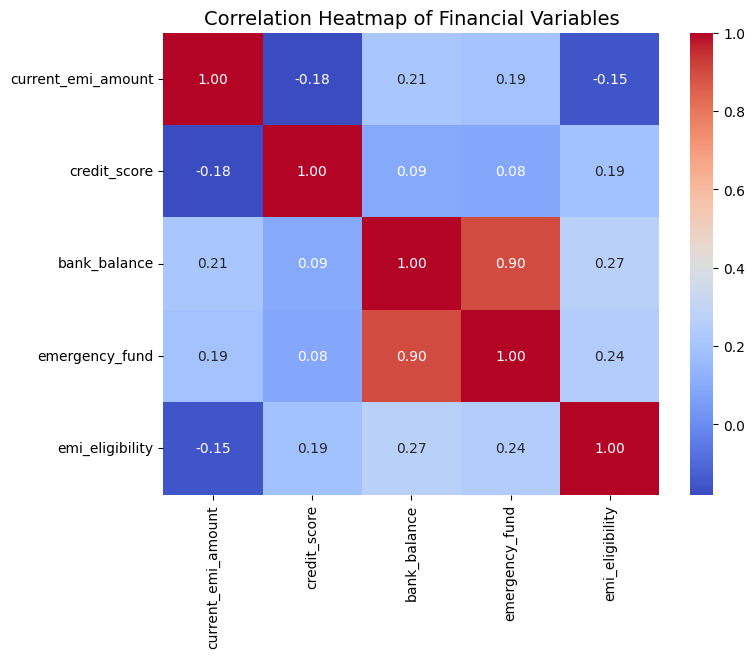

In [ ]:
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Financial Variables", fontsize=14)
plt.show()

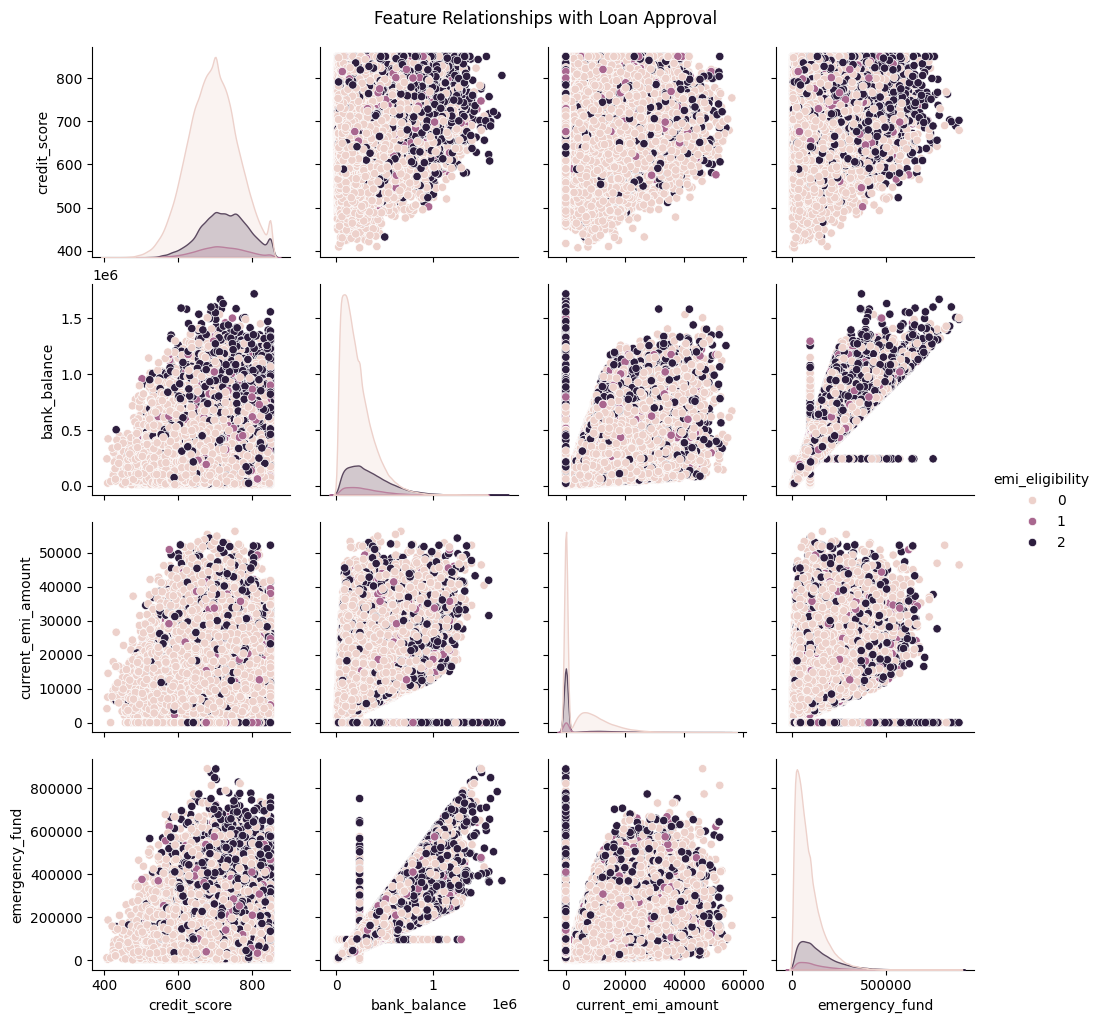

In [ ]:
sns.pairplot(df, vars=["credit_score", "bank_balance", "current_emi_amount", "emergency_fund"], hue="emi_eligibility")
plt.suptitle("Feature Relationships with Loan Approval", y=1.02)
plt.show()

Investigate demographic patterns and risk factor relationships

In [ ]:
df = pd.DataFrame({
    "age": data["age"],
    "gender": data["gender"],
    "marital_status": data["marital_status"],
    "education": data["education"]
})


In [ ]:
distinct_age = df["age"].unique()
print(distinct_age)

[38 58 48 32 27 47 37 31 59 49 33 26 39 57 28]


Text(0.5, 1.0, 'Age Distribution')

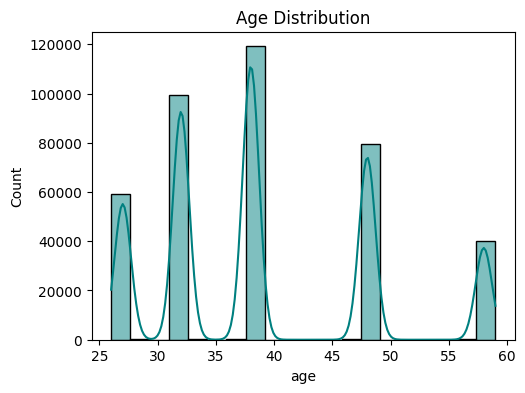

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df["age"], bins=20, kde=True, color="teal")
plt.title("Age Distribution")


In [ ]:
df["gender"] = df["gender"].replace("female","Female")
df["gender"] = df["gender"].replace("male","Male")
df["gender"] = df["gender"].replace("M","Male")
df["gender"] = df["gender"].replace("MALE","Male")
df["gender"] = df["gender"].replace("F","Female")
df["gender"] = df["gender"].replace("FEMALE","Female")
distinct_genders = df["gender"].unique()
print(distinct_genders)

['Female' 'Male']


/tmp/ipython-input-1636418390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=df, palette="Set2")


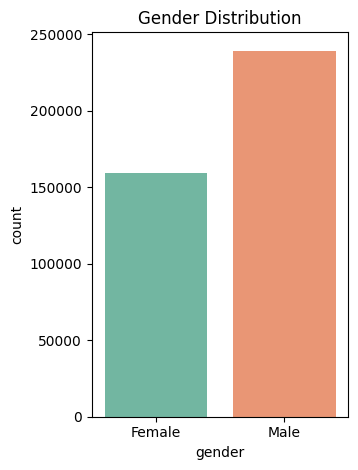

In [ ]:
plt.subplot(1, 2, 2)
sns.countplot(x="gender", data=df, palette="Set2")
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2150378524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="marital_status", data=df, ax=axes[0], palette="pastel")
/tmp/ipython-input-2150378524.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="education", data=df, ax=axes[1], palette="coolwarm")


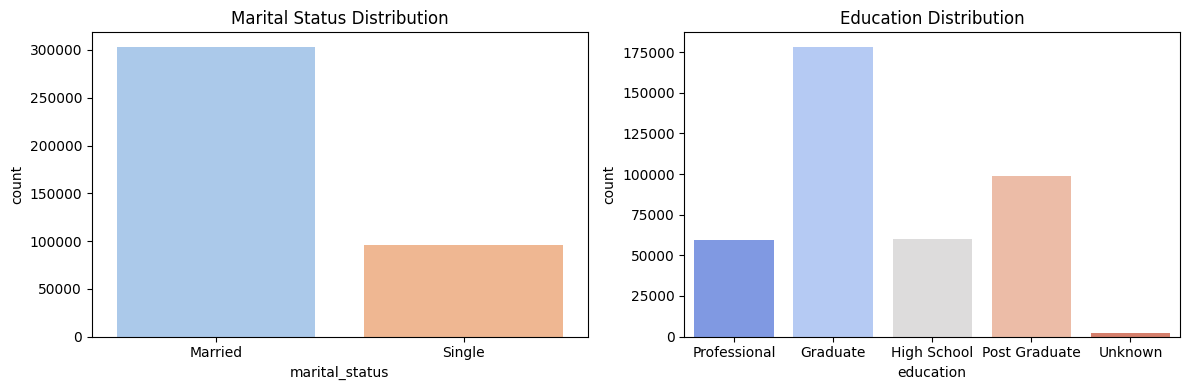

In [ ]:
# Marital status and education
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x="marital_status", data=df, ax=axes[0], palette="pastel")
axes[0].set_title("Marital Status Distribution")
sns.countplot(x="education", data=df, ax=axes[1], palette="coolwarm")
axes[1].set_title("Education Distribution")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3137652703.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gender", y="age", data=df, palette="viridis")


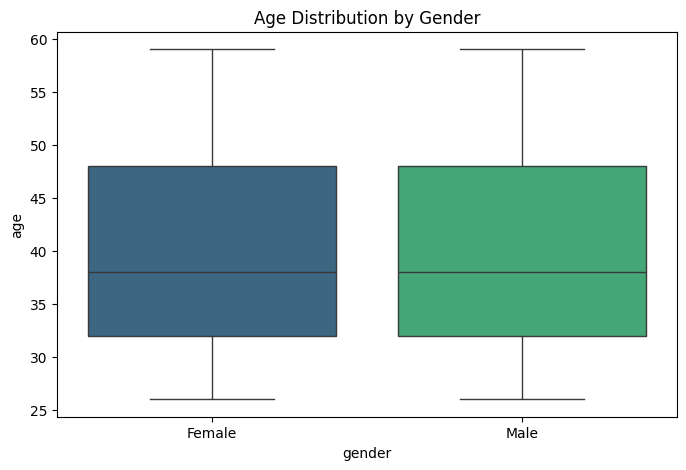

/tmp/ipython-input-3137652703.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="marital_status", y="age", data=df, palette="mako")


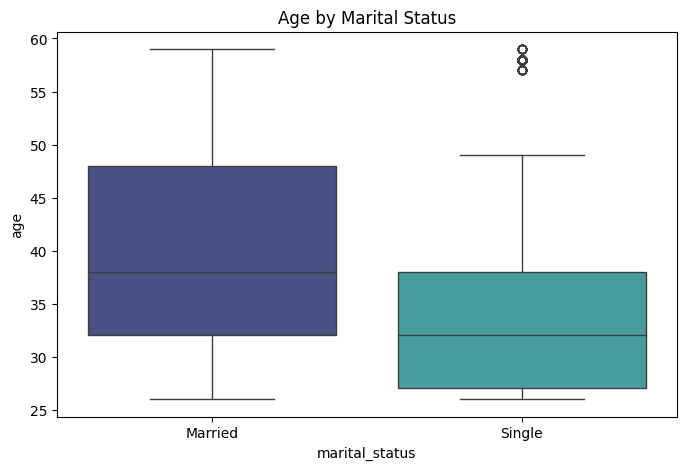

/tmp/ipython-input-3137652703.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="education", y="age", data=df, palette="cubehelix")


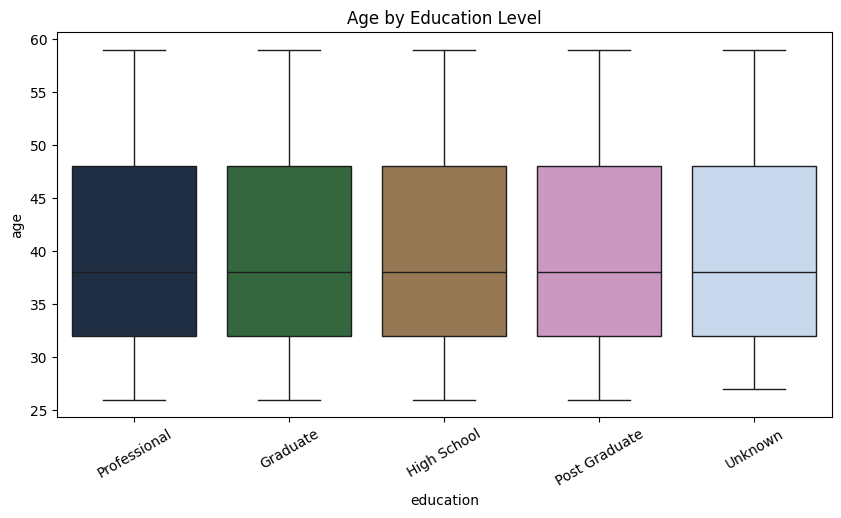

In [ ]:
# ----------------------------
# 4. Bivariate Analysis
# ----------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(x="gender", y="age", data=df, palette="viridis")
plt.title("Age Distribution by Gender")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="marital_status", y="age", data=df, palette="mako")
plt.title("Age by Marital Status")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="education", y="age", data=df, palette="cubehelix")
plt.title("Age by Education Level")
plt.xticks(rotation=30)
plt.show()

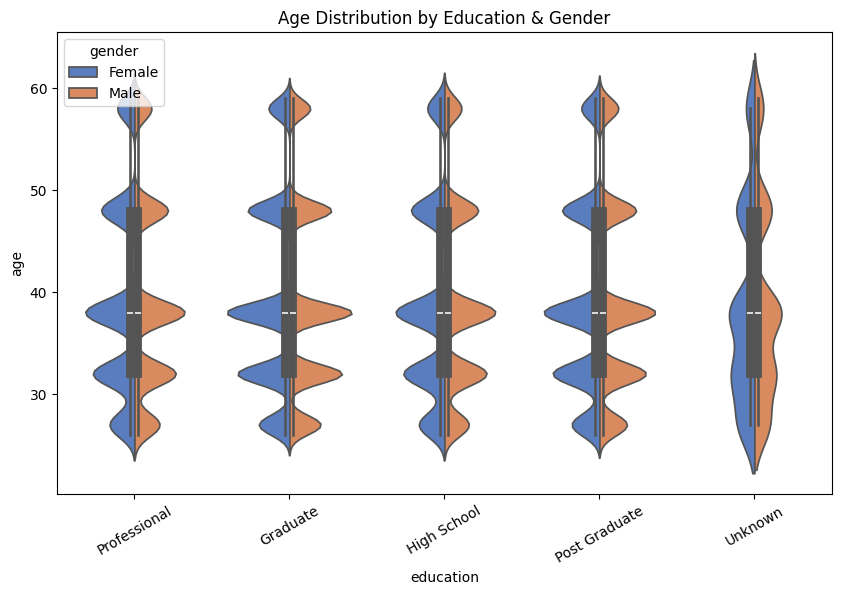

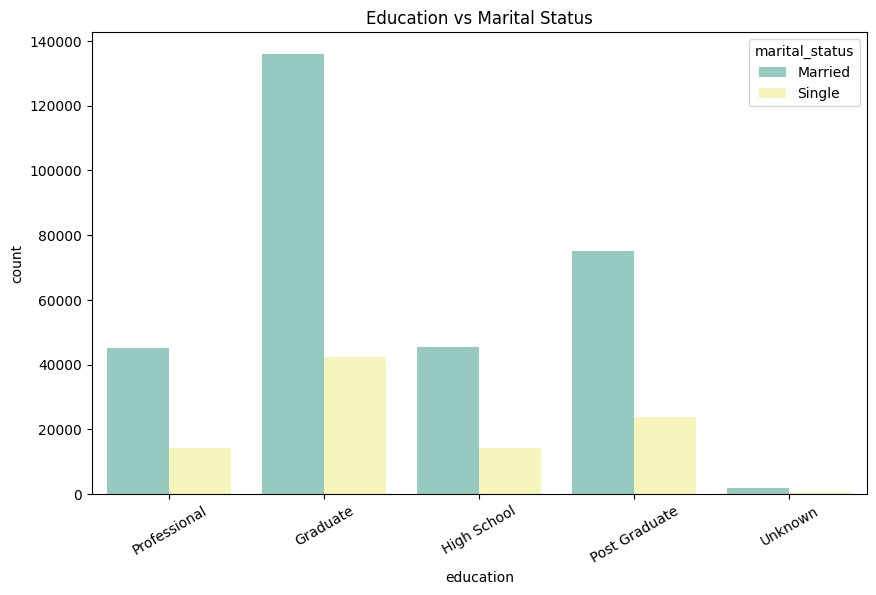

In [ ]:
# ----------------------------
# 5. Multivariate Analysis
# ----------------------------
plt.figure(figsize=(10, 6))
sns.violinplot(x="education", y="age", hue="gender", data=df, split=True, palette="muted")
plt.title("Age Distribution by Education & Gender")
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x="education", hue="marital_status", data=df, palette="Set3")
plt.title("Education vs Marital Status")
plt.xticks(rotation=30)
plt.show()


In [ ]:
df = pd.DataFrame({
    "age": data["age"],
    "gender": data["gender"],
    "marital_status": data["marital_status"],
    "education": data["education"],
    "monthly_salary": data["monthly_salary"],
    "credit_score": data["credit_score"]
})
# Derived risk factor (simulate higher default for low credit score + low income)
df["default_risk"] = np.where(
    (df["credit_score"] < 620) | (df["monthly_salary"] < 45000),
    "High Risk",
    np.where(df["credit_score"] < 700, "Medium Risk", "Low Risk")
)


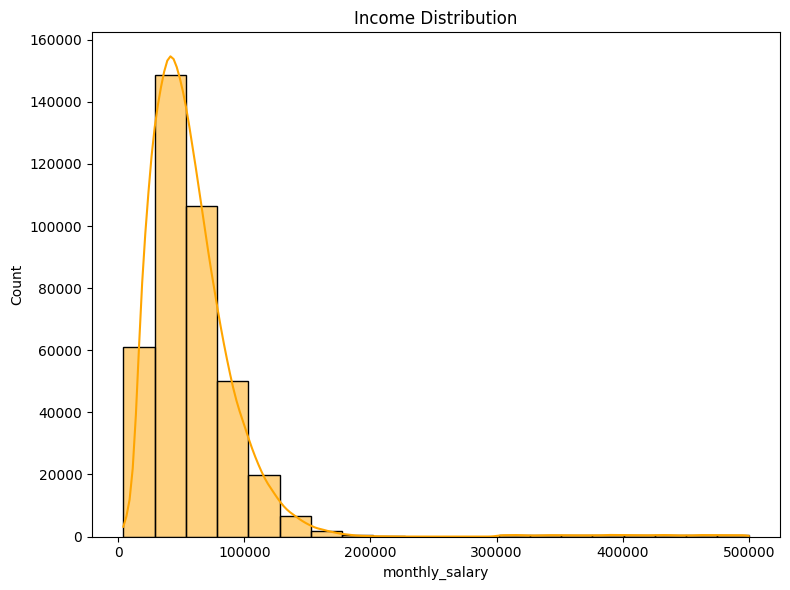

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df["monthly_salary"], kde=True, color="orange", bins=20)
plt.title("Income Distribution")
plt.tight_layout()
plt.show()

In [ ]:
df["gender"] = df["gender"].replace("female","Female")
df["gender"] = df["gender"].replace("male","Male")
df["gender"] = df["gender"].replace("M","Male")
df["gender"] = df["gender"].replace("MALE","Male")
df["gender"] = df["gender"].replace("F","Female")
df["gender"] = df["gender"].replace("FEMALE","Female")
distinct_genders = df["gender"].unique()
print(distinct_genders)

['Female' 'Male']


/tmp/ipython-input-1978746923.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="education", y="monthly_salary", data=df, palette="viridis")


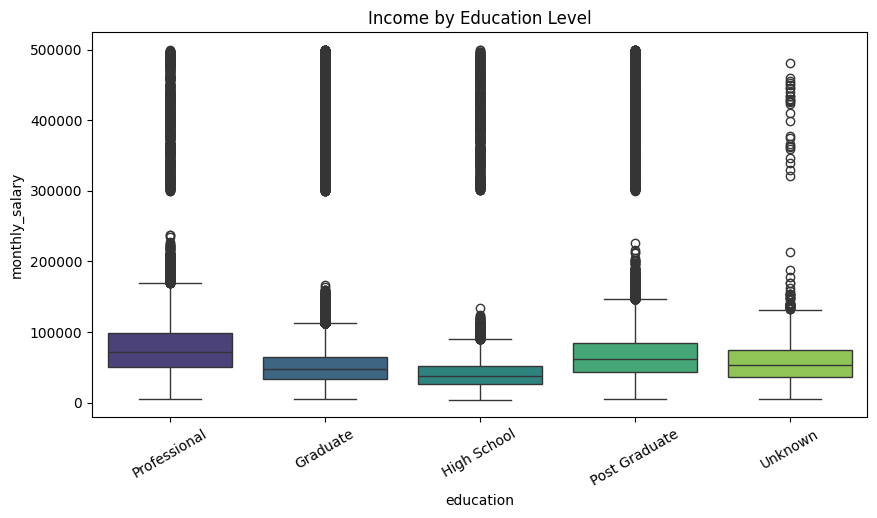

/tmp/ipython-input-1978746923.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="default_risk", y="credit_score", data=df, palette="Set2")


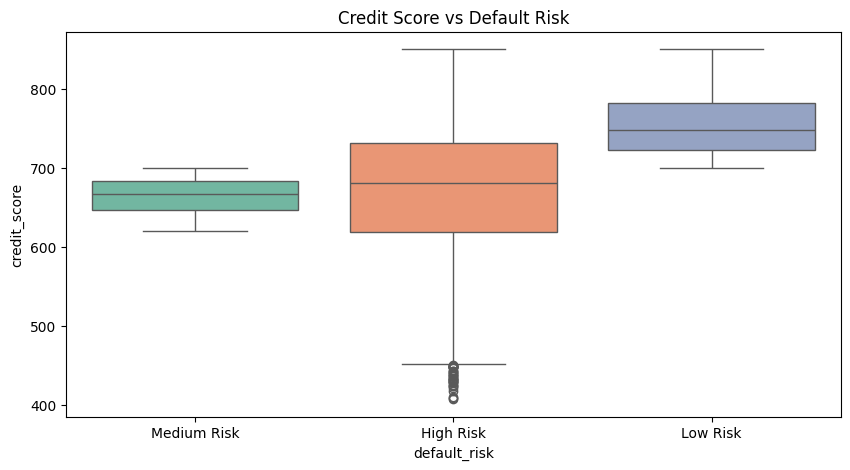

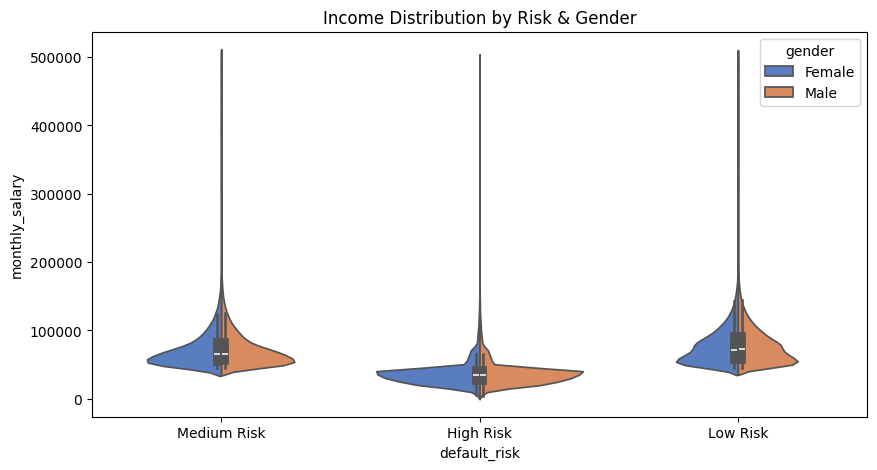

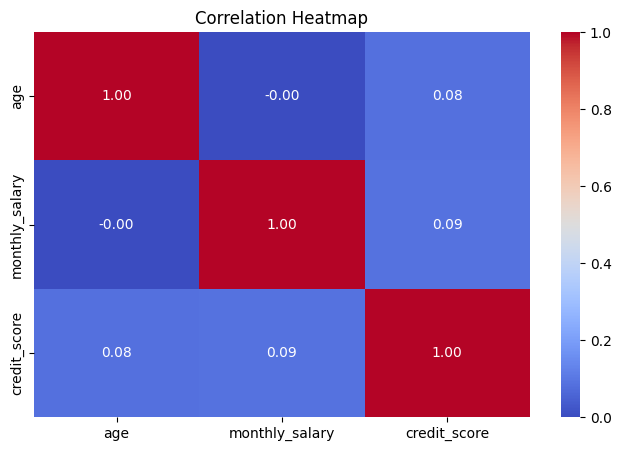

In [ ]:
# ----------------------------
# 4. Bivariate Relationships
# ----------------------------
plt.figure(figsize=(10, 5))
sns.boxplot(x="education", y="monthly_salary", data=df, palette="viridis")
plt.title("Income by Education Level")
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="default_risk", y="credit_score", data=df, palette="Set2")
plt.title("Credit Score vs Default Risk")
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(x="default_risk", y="monthly_salary", hue="gender", data=df, split=True, palette="muted")
plt.title("Income Distribution by Risk & Gender")
plt.show()

# ----------------------------
# 5. Correlation Analysis
# ----------------------------
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Create derived financial ratios (debt-to-income, expense-to-income, affordability ratios)


In [13]:
data["DTI"] = round(data["current_emi_amount"]/data["monthly_salary"],2)
data["ETI"] = round((data["school_fees"]+data["college_fees"]+data["travel_expenses"]+data["groceries_utilities"]+data["other_monthly_expenses"])/data["monthly_salary"],2)
data["affordability ratios"] = round((data["current_emi_amount"]+data["school_fees"]+data["college_fees"]+data["travel_expenses"]+data["groceries_utilities"]+data["other_monthly_expenses"])/data["monthly_salary"],2)
data

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi,emi_to_income_ratio,DTI,ETI,affordability ratios
0,38,Female,Married,Professional,82600,Private,0.9,Mid-size,Rented,20000.0,...,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0,0.01,0.29,0.48,0.77
1,38,Female,Married,Graduate,21500,Private,7.0,MNC,Family,0.0,...,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0,0.03,0.19,0.72,0.91
2,38,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,...,324200.0,Education EMI,306000.0,16,Eligible,27775.0,0.32,0.00,0.41,0.41
3,58,Female,Married,High School,66800,Private,2.2,Mid-size,Own,0.0,...,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0,0.24,0.00,0.56,0.56
4,48,Female,Married,Professional,57300,Private,3.4,Mid-size,Family,0.0,...,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0,0.01,0.00,1.02,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404795,27,Male,Married,Graduate,32400,Private,5.0,Large Indian,Rented,10400.0,...,32600.0,Personal Loan EMI,506000.0,47,Not_Eligible,500.0,0.02,0.00,0.71,0.71
404796,38,Male,Married,Post Graduate,49200,Private,1.9,MNC,Own,0.0,...,38100.0,Personal Loan EMI,708000.0,33,Not_Eligible,5200.0,0.11,0.00,0.79,0.79
404797,32,Male,Single,Graduate,25700,Private,3.2,MNC,Rented,6300.0,...,39700.0,Home Appliances EMI,93000.0,21,High_Risk,5665.0,0.22,0.00,0.35,0.35
404798,48,Male,Married,Graduate,47200,Private,3.0,MNC,Own,0.0,...,45600.0,Home Appliances EMI,144000.0,36,Eligible,14460.0,0.31,0.00,0.49,0.49


In [14]:
data["gender"] = data["gender"].replace("female","Female")
data["gender"] = data["gender"].replace("male","Male")
data["gender"] = data["gender"].replace("M","Male")
data["gender"] = data["gender"].replace("MALE","Male")
data["gender"] = data["gender"].replace("F","Female")
data["gender"] = data["gender"].replace("FEMALE","Female")
distinct_genders = data["gender"].unique()
print(distinct_genders)

['Female' 'Male']


In [ ]:
distinct_genders = data["existing_loans"].unique()
print(distinct_genders)

['Yes' 'No']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398812 entries, 0 to 404799
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      398812 non-null  int64  
 1   age                     398812 non-null  int64  
 2   gender                  398812 non-null  object 
 3   marital_status          398812 non-null  object 
 4   education               398812 non-null  object 
 5   monthly_salary          398812 non-null  float64
 6   employment_type         398812 non-null  object 
 7   years_of_employment     398812 non-null  float64
 8   company_type            398812 non-null  object 
 9   house_type              398812 non-null  object 
 10  monthly_rent            398812 non-null  float64
 11  family_size             398812 non-null  int64  
 12  dependents              398812 non-null  int64  
 13  school_fees             398812 non-null  float64
 14  college_fees            3

In [ ]:
unique_values = data["emi_eligibility"].unique()
print("Unique EMI Eligibility values:", unique_values)

Unique EMI Eligibility values: ['Not_Eligible' 'Eligible' 'High_Risk']


Generate risk scoring features based on credit history and employment stability


In [15]:
def calculate_credit_risk_score(credit_score, current_emi_amount):
    # Normalize credit score (300–850)
    credit_score_norm = (credit_score - 300) / (850 - 300)
    credit_score_norm = max(0, min(credit_score_norm, 1))  # clamp 0–1

    # Normalize EMI amount (assuming 1L as high-risk threshold)
    emi_norm = current_emi_amount / 100000
    emi_norm = max(0, min(emi_norm, 1))  # clamp 0–1

    # Weighted score
    risk_score = (0.7 * credit_score_norm + 0.3 * (1 - emi_norm)) * 100
    return round(risk_score, 2)

In [16]:
data["credit_risk_score"] = data.apply(
    lambda row: calculate_credit_risk_score(row["credit_score"], row["current_emi_amount"]),
    axis=1
)
data

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi,emi_to_income_ratio,DTI,ETI,affordability ratios,credit_risk_score
0,38,Female,Married,Professional,82600,Private,0.9,Mid-size,Rented,20000.0,...,Personal Loan EMI,850000.0,15,Not_Eligible,500.0,0.01,0.29,0.48,0.77,68.71
1,38,Female,Married,Graduate,21500,Private,7.0,MNC,Family,0.0,...,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0,0.03,0.19,0.72,0.91,81.46
2,38,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,...,Education EMI,306000.0,16,Eligible,27775.0,0.32,0.00,0.41,0.41,74.55
3,58,Female,Married,High School,66800,Private,2.2,Mid-size,Own,0.0,...,Vehicle EMI,304000.0,83,Eligible,16170.0,0.24,0.00,0.56,0.56,79.00
4,48,Female,Married,Professional,57300,Private,3.4,Mid-size,Family,0.0,...,Home Appliances EMI,252000.0,7,Not_Eligible,500.0,0.01,0.00,1.02,1.02,89.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404795,27,Male,Married,Graduate,32400,Private,5.0,Large Indian,Rented,10400.0,...,Personal Loan EMI,506000.0,47,Not_Eligible,500.0,0.02,0.00,0.71,0.71,74.42
404796,38,Male,Married,Post Graduate,49200,Private,1.9,MNC,Own,0.0,...,Personal Loan EMI,708000.0,33,Not_Eligible,5200.0,0.11,0.00,0.79,0.79,82.44
404797,32,Male,Single,Graduate,25700,Private,3.2,MNC,Rented,6300.0,...,Home Appliances EMI,93000.0,21,High_Risk,5665.0,0.22,0.00,0.35,0.35,77.85
404798,48,Male,Married,Graduate,47200,Private,3.0,MNC,Own,0.0,...,Home Appliances EMI,144000.0,36,Eligible,14460.0,0.31,0.00,0.49,0.49,91.60


In [17]:
def employment_stability_score(row):
    # Employment type mapping
    emp_type_map = {
        "Government": 1.0,
        "Private": 0.75,
        "Self-employed": 0.6
    }

    f1 = emp_type_map.get(row["employment_type"], 0.5)
    f2 = min(row["years_of_employment"] / 10, 1)

    # Weighted formula
    score = 0.6 * f1 + 0.4 * f2
    return round(score, 3)



data["employment_stability_score"] = data.apply(employment_stability_score, axis=1)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398812 entries, 0 to 404799
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          398812 non-null  int64  
 1   age                         398812 non-null  object 
 2   gender                      398812 non-null  object 
 3   marital_status              398812 non-null  object 
 4   education                   398812 non-null  object 
 5   monthly_salary              398812 non-null  int64  
 6   employment_type             398812 non-null  object 
 7   years_of_employment         398812 non-null  float64
 8   company_type                398812 non-null  object 
 9   house_type                  398812 non-null  object 
 10  monthly_rent                398812 non-null  float64
 11  family_size                 398812 non-null  int64  
 12  dependents                  398812 non-null  int64  
 13  school_fees        

In [ ]:
numerical_columns = data.select_dtypes(include=['number']).columns
numerical_columns = np.delete(numerical_columns, 0, axis=0)

print(numerical_columns)

Index(['age', 'monthly_salary', 'years_of_employment', 'monthly_rent',
       'family_size', 'dependents', 'school_fees', 'college_fees',
       'travel_expenses', 'groceries_utilities', 'other_monthly_expenses',
       'current_emi_amount', 'credit_score', 'bank_balance', 'emergency_fund',
       'requested_amount', 'requested_tenure', 'emi_to_income_ratio', 'DTI',
       'ETI', 'affordability ratios', 'credit_risk_score',
       'employment_stability_score'],
      dtype='object')


In [ ]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['gender', 'marital_status', 'education', 'employment_type',
       'company_type', 'house_type', 'existing_loans', 'emi_scenario'],
      dtype='object')


Apply categorical encoding and numerical feature scaling


In [18]:
data_depend_class = data["emi_eligibility"]
data_depend_class
data_depend_reg = data["max_monthly_emi"]
data_depend_reg
data = data.drop(["emi_eligibility", "max_monthly_emi"], axis=1)
data_independ = data
data_independ = pd.get_dummies(data_independ)
data_independ

,age,monthly_salary,years_of_employment,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,...,house_type_Family,house_type_Own,house_type_Rented,existing_loans_No,existing_loans_Yes,emi_scenario_E-commerce Shopping EMI,emi_scenario_Education EMI,emi_scenario_Home Appliances EMI,emi_scenario_Personal Loan EMI,emi_scenario_Vehicle EMI
0,38,82600,0.9,20000.0,3,2,0.0,0.0,7200.0,19500.0,...,False,False,True,False,True,False,False,False,True,False
1,38,21500,7.0,0.0,2,1,5100.0,0.0,1400.0,5400.0,...,True,False,False,False,True,True,False,False,False,False
2,38,86100,5.8,0.0,4,3,0.0,0.0,10200.0,19400.0,...,False,True,False,True,False,False,True,False,False,False
3,58,66800,2.2,0.0,5,4,11400.0,0.0,6200.0,11900.0,...,False,True,False,True,False,False,False,False,False,True
4,48,57300,3.4,0.0,4,3,9400.0,21300.0,3600.0,16200.0,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404795,27,32400,5.0,10400.0,4,3,2800.0,7000.0,2200.0,4900.0,...,False,False,True,True,False,False,False,False,True,False
404796,38,49200,1.9,0.0,5,4,14000.0,0.0,2600.0,13600.0,...,False,True,False,True,False,False,False,False,True,False
404797,32,25700,3.2,6300.0,1,0,0.0,0.0,2000.0,4600.0,...,False,False,True,True,False,False,False,True,False,False
404798,48,47200,3.0,0.0,4,3,0.0,0.0,7000.0,8900.0,...,False,True,False,True,False,False,False,True,False,False


In [21]:

data_independ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398812 entries, 0 to 404799
Data columns (total 50 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   age                                   398812 non-null  int64  
 1   monthly_salary                        398812 non-null  int64  
 2   years_of_employment                   398812 non-null  float64
 3   monthly_rent                          398812 non-null  float64
 4   family_size                           398812 non-null  int64  
 5   dependents                            398812 non-null  int64  
 6   school_fees                           398812 non-null  float64
 7   college_fees                          398812 non-null  float64
 8   travel_expenses                       398812 non-null  float64
 9   groceries_utilities                   398812 non-null  float64
 10  other_monthly_expenses                398812 non-null  float64
 11  curre

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
def get_data_transformer_object():
        '''
        This function is responsible for data trnasformation

        '''

        numerical_columns = data_independ.select_dtypes(include=['number']).columns

        categorical_columns = data_independ.select_dtypes(include=['object', 'category']).columns
        num_pipeline= Pipeline(
                steps=[
                ("imputer",SimpleImputer(strategy="median")),
                ("scaler",StandardScaler())
                ]
            )
        cat_pipeline=Pipeline(
                steps=[
                ("imputer",SimpleImputer(strategy="most_frequent")),
                ("one_hot_encoder",OneHotEncoder()),
                ("scaler",StandardScaler(with_mean=False))
                ]
            )

        preprocessor=ColumnTransformer(
                [
                ("num_pipeline",num_pipeline,numerical_columns),
                ("cat_pipelines",cat_pipeline,categorical_columns)
                ]
            )
        preprocess_type=type(preprocessor)
        return preprocessor



In [29]:
preprocessing_obj = get_data_transformer_object()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398812 entries, 0 to 404799
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   age                         398812 non-null  int64  
 1   gender                      398812 non-null  object 
 2   marital_status              398812 non-null  object 
 3   education                   398812 non-null  object 
 4   monthly_salary              398812 non-null  int64  
 5   employment_type             398812 non-null  object 
 6   years_of_employment         398812 non-null  float64
 7   company_type                398812 non-null  object 
 8   house_type                  398812 non-null  object 
 9   monthly_rent                398812 non-null  float64
 10  family_size                 398812 non-null  int64  
 11  dependents                  398812 non-null  int64  
 12  school_fees                 398812 non-null  float64
 13  college_fees       

In [41]:
from sklearn.model_selection import train_test_split

preprocessing_obj=get_data_transformer_object()
preprocessing_obj.fit(data_independ)


X_train,X_test,y_train,y_test = train_test_split(data_independ,data_depend_class,test_size=0.30,random_state=42)
X_train_reg,X_test_reg,y_train_reg,y_test_reg = train_test_split(data_independ,data_depend_reg,test_size=0.30,random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
input_feature_train_arr=scaler.fit_transform(X_train)
scaler.fit(X_test)
input_feature_test_arr=scaler.transform(X_test)
scaler.fit(X_train_reg)
input_feature_train_arr_reg=scaler.fit_transform(X_train_reg)
scaler.fit(X_test_reg)
input_feature_test_arr_reg=scaler.transform(X_test_reg)
X_train.info()
print(input_feature_train_arr.shape)


<class 'pandas.core.frame.DataFrame'>
Index: 279168 entries, 64296 to 123845
Data columns (total 50 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   age                                   279168 non-null  int64  
 1   monthly_salary                        279168 non-null  int64  
 2   years_of_employment                   279168 non-null  float64
 3   monthly_rent                          279168 non-null  float64
 4   family_size                           279168 non-null  int64  
 5   dependents                            279168 non-null  int64  
 6   school_fees                           279168 non-null  float64
 7   college_fees                          279168 non-null  float64
 8   travel_expenses                       279168 non-null  float64
 9   groceries_utilities                   279168 non-null  float64
 10  other_monthly_expenses                279168 non-null  float64
 11  c

In [ ]:
pip install src.utils

ERROR: Could not find a version that satisfies the requirement src.utils (from versions: none)
ERROR: No matching distribution found for src.utils


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

def evaluate_models(X_train, y_train, X_test, y_test, models,params):
    """
    Example function to evaluate multiple models
    """
    report = {}

    for model_name, model in models.items():
        print(f"\n🔹 Training and tuning {model_name}...")

        # Get the parameter grid
        param_grid = params.get(model_name, {})

        # GridSearchCV for hyperparameter tuning
        gs = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=0)
        gs.fit(X_train, y_train)

        # Best model
        best_model = gs.best_estimator_
        best_model.fit(X_train, y_train)

        # Predictions
        y_pred = best_model.predict(X_test)

        # Compute evaluation metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # Compute ROC-AUC (handle binary/multiclass)
        try:
            if len(np.unique(y_test)) > 2:
                y_proba = best_model.predict_proba(X_test)
                roc = roc_auc_score(y_test, y_proba, multi_class='ovr')
            else:
                roc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
        except Exception:
            roc = np.nan

        report[model_name] = {
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1-Score': f1,
            'ROC-AUC': roc,
            'Best Params': gs.best_params_
        }

        print(f"{model_name} ✅ | Accuracy: {acc:.3f} | F1: {f1:.3f}")

    return report



In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

def initiate_model_trainer():
  models = {
                "Random Forest": RandomForestClassifier(),
                "Logistic Regression": LogisticRegression(),
                "XGBClassifier": XGBClassifier(),

            }
  params={

                "Random Forest":{
                    'n_estimators': [8,16,32,64,128,256]
                },
                "Logistic Regression":{},
                "XGBClassifier":{
                    'learning_rate':[.1,.01,.05,.001],
                    'n_estimators': [8,16,32,64,128,256]
                }
            }
  label_encoder = LabelEncoder()
  y_train_encoded = label_encoder.fit_transform(y_train)
  y_test_encoded = label_encoder.transform(y_test)
  model_report:dict=evaluate_models(X_train=input_feature_train_arr,y_train=y_train_encoded,X_test=input_feature_test_arr,y_test=y_test_encoded,
                                             models=models,params=params)
  # Select best model based on F1-Score (you can change to Accuracy or ROC-AUC)
  best_model_name = max(model_report, key=lambda x: model_report[x]['F1-Score'])
  best_model_score = model_report[best_model_name]['F1-Score']

  print("\n===== Final Model Performance =====")
  for name, metrics in model_report.items():
        print(f"\n📘 {name}")
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.4f}" if isinstance(value, float) else f"  {metric}: {value}")

  print(f"\n🏆 Best Model: {best_model_name} | F1-Score: {best_model_score:.4f}")

    # Re-train best model
  best_model = models[best_model_name]
  best_model.set_params(**model_report[best_model_name]['Best Params'])
  best_model.fit(input_feature_train_arr, y_train_encoded)

    # Predictions
  #predicted_encoded = best_model.predict(input_feature_test_arr)
  #predicted_labels = label_encoder.inverse_transform(predicted_encoded)

  #print("\n✅ Predicted Labels (decoded):")
  #print(predicted_labels)

  return best_model, model_report


In [ ]:
best_model, model_report = initiate_model_trainer()


🔹 Training and tuning Random Forest...
Random Forest ✅ | Accuracy: 0.949 | F1: 0.929

🔹 Training and tuning Logistic Regression...
Logistic Regression ✅ | Accuracy: 0.903 | F1: 0.883

🔹 Training and tuning XGBClassifier...
XGBClassifier ✅ | Accuracy: 0.975 | F1: 0.973

===== Final Model Performance =====

📘 Random Forest
  Accuracy: 0.9487
  Precision: 0.9458
  Recall: 0.9487
  F1-Score: 0.9295
  ROC-AUC: 0.9829
  Best Params: {'n_estimators': 256}

📘 Logistic Regression
  Accuracy: 0.9025
  Precision: 0.8672
  Recall: 0.9025
  F1-Score: 0.8833
  ROC-AUC: 0.9387
  Best Params: {}

📘 XGBClassifier
  Accuracy: 0.9754
  Precision: 0.9737
  Recall: 0.9754
  F1-Score: 0.9727
  ROC-AUC: 0.9954
  Best Params: {'learning_rate': 0.1, 'n_estimators': 256}

🏆 Best Model: XGBClassifier | F1-Score: 0.9727


   age gender marital_status      education  monthly_salary employment_type  \
0   32   Male        Married  Post Graduate          148600         Private   

   years_of_employment company_type house_type  monthly_rent  ...  \
0                   16          MNC     Rented         28300  ...   

   emergency_fund  emi_scenario  requested_amount  requested_tenure  DTI  \
0        600000.0   Vehicle EMI         1055000.0                80  0.0   

    ETI  affordability ratios emi_to_income_ratio  credit_risk_score  \
0  0.53                  0.53                 0.0              83.07   

   employment_stability_score  
0                        0.85  

[1 rows x 31 columns]
[[-0.73912032  2.04732025  1.74615866  2.60814077  0.98506763  0.98506763
  -0.43848691  1.81963476  1.5668919   1.38930143  4.02488785 -0.64402934
   0.243373    6.87932544  6.20344646  1.97605124  2.80665213 -0.76230275
   0.37367495  1.34358576]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:08:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[2]
['Not_Eligible']

🏦 EMI Eligibility Prediction: Not_Eligible


In [ ]:
print(pd.Series(y_train).value_counts())

emi_eligibility
Not_Eligible    215561
Eligible         51507
High_Risk        12100
Name: count, dtype: int64


In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{'Eligible': np.int64(51507), 'High_Risk': np.int64(12100), 'Not_Eligible': np.int64(215561)}


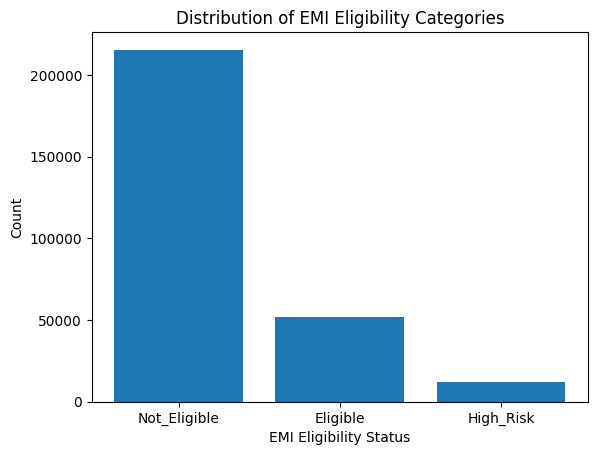

In [ ]:
# Suppose your target column is named 'emi_eligibility'
counts = y_train.value_counts()

plt.bar(counts.index, counts.values)
plt.xlabel('EMI Eligibility Status')
plt.ylabel('Count')
plt.title('Distribution of EMI Eligibility Categories')
plt.show()

In [ ]:
print("Unique values in y_train:", y_train.unique())

Unique values in y_train: ['Not_Eligible' 'Eligible' 'High_Risk']


In [ ]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))

Class distribution: {'Eligible': np.int64(51507), 'High_Risk': np.int64(12100), 'Not_Eligible': np.int64(215561)}


In [ ]:
initiate_model_trainer()


🔹 Training and tuning Random Forest...
Random Forest ✅ | Accuracy: 0.949 | F1: 0.929

🔹 Training and tuning Logistic Regression...
Logistic Regression ✅ | Accuracy: 0.903 | F1: 0.883

🔹 Training and tuning XGBClassifier...
XGBClassifier ✅ | Accuracy: 0.975 | F1: 0.973

===== Final Model Performance =====

📘 Random Forest
  Accuracy: 0.9485
  Precision: 0.9455
  Recall: 0.9485
  F1-Score: 0.9292
  ROC-AUC: 0.9828
  Best Params: {'n_estimators': 256}

📘 Logistic Regression
  Accuracy: 0.9025
  Precision: 0.8672
  Recall: 0.9025
  F1-Score: 0.8833
  ROC-AUC: 0.9387
  Best Params: {}

📘 XGBClassifier
  Accuracy: 0.9754
  Precision: 0.9737
  Recall: 0.9754
  F1-Score: 0.9727
  ROC-AUC: 0.9954
  Best Params: {'learning_rate': 0.1, 'n_estimators': 256}

🏆 Best Model: XGBClassifier | F1-Score: 0.9727

✅ Predicted Labels (decoded):
['Not_Eligible' 'Not_Eligible' 'High_Risk' ... 'Not_Eligible'
 'Not_Eligible' 'Not_Eligible']


(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.1, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=256,
               n_jobs=None, num_parallel_tree=None, ...),
 array(['Not_Eligible', 'Not_Eligible', 'High_Risk', ..., 'Not_Eligible',
        'Not_Eligible', 'Not_Eligible'], dtype=object),
 {'Random Forest': {'Accuracy': 0.9485055665139915,
   'Precision': 0.9454832963311779,
   'Recall'

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_models_reg(X_train, y_train, X_test, y_test, models, params):
    report = {}

    for model_name, model in models.items():
        print(f"\n🔹 Training {model_name}...")
        model.set_params(**params.get(model_name, {}))  # Apply hyperparameters if any
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

        report[model_name] = {
            "MAE": mae,
            "RMSE": rmse,
            "R2": r2,
            "MAPE": mape
        }

    return report


In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

def initiate_regression_model_trainer():
   models = {
        "Random Forest": RandomForestRegressor(),
        "Linear Regression": LinearRegression(),
        "XGBRegressor": XGBRegressor(),
    }

   params = {
        "Random Forest": {'n_estimators': 100, 'random_state': 42},
        "Linear Regression": {},
        "XGBRegressor": {'learning_rate': 0.1, 'n_estimators': 100}
    }

   model_report = evaluate_models_reg(
        X_train=input_feature_train_arr_reg,y_train=y_train_reg,X_test=input_feature_test_arr_reg,y_test=y_test_reg,
                                             models=models,params=params
    )

    # Select best model based on RMSE (lower is better)
   best_model_name = min(model_report, key=lambda x: model_report[x]['RMSE'])
   best_model_score = model_report[best_model_name]['RMSE']

   print("\n===== Final Model Performance =====")
   for name, metrics in model_report.items():
        print(f"\n📘 {name}")
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.4f}")

   print(f"\n🏆 Best Model: {best_model_name} | RMSE: {best_model_score:.4f}")

    # Retrain best model
   best_model = models[best_model_name]
   best_model.set_params(**params.get(best_model_name, {}))
   best_model.fit(input_feature_train_arr_reg, y_train_reg)

   predicted = best_model.predict(input_feature_test_arr_reg)

   print("\n✅ Predicted Values:")
   print(predicted[:10])

   return best_model, predicted, model_report

In [ ]:
initiate_regression_model_trainer()


🔹 Training Random Forest...

🔹 Training Linear Regression...

🔹 Training XGBRegressor...

===== Final Model Performance =====

📘 Random Forest
  MAE: 128.1679
  RMSE: 225.4344
  R2: 0.9992
  MAPE: 3.1801

📘 Linear Regression
  MAE: 2588.5403
  RMSE: 3813.1226
  R2: 0.7576
  MAPE: 159.5788

📘 XGBRegressor
  MAE: 160.9286
  RMSE: 422.7260
  R2: 0.9970
  MAPE: 3.9171

🏆 Best Model: Random Forest | RMSE: 225.4344

✅ Predicted Values:
[  557.367    518.005  31514.104   6585.3105  4640.1409  9109.74
 11948.884  22603.7     4094.74     500.2   ]


(RandomForestRegressor(random_state=42),
 array([  557.367 ,   518.005 , 31514.104 , ...,   500.    ,  6265.3228,
         1859.6744]),
 {'Random Forest': {'MAE': 128.16792698505566,
   'RMSE': np.float64(225.43439517779674),
   'R2': 0.9991526829673446,
   'MAPE': np.float64(3.1801430047012893)},
  'Linear Regression': {'MAE': 2588.5403021846337,
   'RMSE': np.float64(3813.122558461696),
   'R2': 0.757580747091862,
   'MAPE': np.float64(159.57880568896925)},
  'XGBRegressor': {'MAE': 160.92855434369582,
   'RMSE': np.float64(422.72597026797206),
   'R2': 0.9970206368685504,
   'MAPE': np.float64(3.917134282045265)}})

In [33]:
print(input_feature_train_arr.shape)

(279168, 50)


In [40]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Step 1️⃣: Create and fit on training data
#preprocessing_obj = get_data_transformer_object(X_train)
  # Fit only on TRAIN data

# Step 2️⃣: Transform training data
#X_train_transformed = preprocessing_obj.transform(X_train)
label_encoder.fit(y_train)



new_applicant = {
    "age": 32,
    "gender": "Male",
    "marital_status": "Married",
    "education": "Post Graduate",
    "monthly_salary": 20000,
    "employment_type": "Private",
    "years_of_employment": 16,
    "company_type": "MNC",
    "house_type": "Rented",
    "monthly_rent": 2830,
    "family_size": 4,
    "dependents": 3,
    "school_fees": 2400,
    "college_fees": 1740,
    "travel_expenses": 1100,
    "groceries_utilities": 2250,
    "other_monthly_expenses": 2530,
    "existing_loans": "No",
    "current_emi_amount": 0,
    "credit_score": 717,
    "bank_balance": 1500000.0,
    "emergency_fund": 600000.0,
    "emi_scenario": "Vehicle EMI",
    "requested_amount": 1055000,
    "requested_tenure": 80
}
# ✅ Convert to DataFrame
new_data = pd.DataFrame([new_applicant])
new_data["DTI"] = round(new_data["current_emi_amount"]/new_data["monthly_salary"],2)
new_data["ETI"] = round((new_data["school_fees"]+new_data["college_fees"]+new_data["travel_expenses"]+new_data["groceries_utilities"]+new_data["other_monthly_expenses"])/new_data["monthly_salary"],2)
new_data["affordability ratios"] = round((new_data["current_emi_amount"]+new_data["school_fees"]+new_data["college_fees"]+new_data["travel_expenses"]+new_data["groceries_utilities"]+new_data["other_monthly_expenses"])/new_data["monthly_salary"],2)

new_data["emi_to_income_ratio"] = round(new_data["current_emi_amount"]/new_data["monthly_salary"], 2)
new_data["credit_risk_score"] = new_data.apply(
    lambda row: calculate_credit_risk_score(row["credit_score"], row["current_emi_amount"]),
    axis=1
)
new_data["employment_stability_score"]=new_data.apply(employment_stability_score, axis=1)

new_data = pd.get_dummies(new_data)
missing_cols = set(X_train.columns) - set(new_data.columns)

for col in missing_cols:
    # Assign default values based on column type
    if X_train[col].dtype == 'bool':
        new_data[col] = False

print(new_data.info())

# Step 2️⃣ - Apply same preprocessing
# (Ensure you saved and reused preprocessing_obj)
# Drop the 'ID' column in-place
#X_train = X_train.drop(columns=['ID'])
new_data = new_data[X_train.columns]
print(new_data.shape)
#preprocessing_obj = get_data_transformer_object(new_data)
#preprocessing_obj.fit(new_data)

# ✅ STEP 1 — Create the preprocessing object using TRAIN data



scaler = StandardScaler()
scaler.fit(new_data)

# Transform training data
processed_data = scaler.transform(new_data)
#processed_data = preprocessor.transform(new_data)

#print("Train shape:", X_train_processed.shape)
print("New row shape:", processed_data.shape)

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#y_train_encoded_reg = label_encoder.fit_transform(y_train_reg)



#sample_weights = compute_sample_weight('balanced', y_train_encoded)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(input_feature_train_arr, y_train_encoded)

#neg, pos = np.bincount(y_train_encoded)
#scale_pos_weight = neg / pos
#print("scale_pos_weight =", scale_pos_weight)

num_classes = len(label_encoder.classes_)
best_model = XGBClassifier(
    objective="multi:softprob",   # multiclass
    num_class=num_classes,        # number of unique labels
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    eval_metric="mlogloss"        # multiclass log-loss
)
#best_model.fit(input_feature_train_arr, y_train_encoded)
best_model.fit(X_res, y_res)

#probs = best_model.predict_proba(processed_data)
#print("Prediction probabilities:", probs)

# Step 3️⃣ - Predict (encoded output)
#predicted_encoded = best_model.predict(processed_data)
#print(predicted_encoded)

probs = best_model.predict_proba(processed_data)
predicted_encoded = np.argmax(probs, axis=1)
#predicted_encoded = (probs[:, 1] > 0.4).astype(int)

# Step 4️⃣ - Decode label (e.g., 0 → Not Eligible, 1 → Eligible)
predicted_label = label_encoder.inverse_transform(predicted_encoded)
print(predicted_label)

best_reg_model = RandomForestRegressor(n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1)
best_reg_model.fit(input_feature_train_arr_reg, y_train_reg)

predicted_emi = best_reg_model.predict(processed_data)

print(f"\n🏦 EMI Eligibility Prediction: {predicted_label[0]}")
print(f"💰 Predicted EMI Amount: ₹{predicted_emi[0]:,.2f}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   1 non-null      int64  
 1   monthly_salary                        1 non-null      int64  
 2   years_of_employment                   1 non-null      int64  
 3   monthly_rent                          1 non-null      int64  
 4   family_size                           1 non-null      int64  
 5   dependents                            1 non-null      int64  
 6   school_fees                           1 non-null      int64  
 7   college_fees                          1 non-null      int64  
 8   travel_expenses                       1 non-null      int64  
 9   groceries_utilities                   1 non-null      int64  
 10  other_monthly_expenses                1 non-null      int64  
 11  current_emi_amount     

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(input_feature_train_arr, y_train_encoded)

#neg, pos = np.bincount(y_train_encoded)
#scale_pos_weight = neg / pos
#print("scale_pos_weight =", scale_pos_weight)

best_model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(label_encoder.classes_),
    n_estimators=256,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)
#best_model.fit(input_feature_train_arr, y_train_encoded, sample_weight=sample_weights)
best_model.fit(X_res, y_res)
probs = best_model.predict_proba(processed_data)
print("Prediction probabilities per class:")
for cls, prob in zip(label_encoder.classes_, probs[0]):
    print(f"{cls}: {prob:.4f}")


Prediction probabilities per class:
Eligible: 0.0007
High_Risk: 0.0004
Not_Eligible: 0.9989


In [ ]:
print(preprocessing_obj.feature_names_in_)
print(new_data.columns)

['ID' 'age' 'monthly_salary' 'years_of_employment' 'monthly_rent'
 'family_size' 'dependents' 'school_fees' 'college_fees' 'travel_expenses'
 'groceries_utilities' 'other_monthly_expenses' 'current_emi_amount'
 'credit_score' 'bank_balance' 'emergency_fund' 'requested_amount'
 'requested_tenure' 'emi_to_income_ratio' 'credit_risk_score'
 'employment_stability_score' 'gender_F' 'gender_FEMALE' 'gender_Female'
 'gender_M' 'gender_MALE' 'gender_Male' 'gender_female' 'gender_male'
 'marital_status_Married' 'marital_status_Single' 'education_Graduate'
 'education_High School' 'education_Post Graduate'
 'education_Professional' 'education_Unknown' 'employment_type_Government'
 'employment_type_Private' 'employment_type_Self-employed'
 'company_type_Large Indian' 'company_type_MNC' 'company_type_Mid-size'
 'company_type_Small' 'company_type_Startup' 'house_type_Family'
 'house_type_Own' 'house_type_Rented' 'existing_loans_No'
 'existing_loans_Yes' 'emi_scenario_E-commerce Shopping EMI'
 'emi_